In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pd.set_option("display.max_columns",None)
data=pd.read_csv("players_20.csv")
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [2]:
data.duplicated().sum()

0

In [3]:
data.body_type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

In [4]:
data.loaned_from.unique()

array([nan, 'FC Barcelona', 'Inter', 'Real Betis', 'Chelsea', 'Sampdoria',
       'Real Madrid', 'Real Sociedad', 'Cagliari', 'FC Schalke 04',
       'Roma', 'Fiorentina', 'Valencia CF', 'Liverpool',
       'Borussia Dortmund', 'Lazio', 'Sevilla FC',
       'Guangzhou Evergrande Taobao FC', 'Villarreal CF', 'Fulham',
       'FC Girondins de Bordeaux', 'Defensa y Justicia', 'Sassuolo',
       'AS Monaco', 'Racing Club', 'SL Benfica', 'Atalanta',
       'Manchester City', 'Sporting CP', 'Monterrey', 'Frosinone',
       'Bournemouth', 'Huddersfield Town', 'Bologna', 'Napoli',
       'Brighton & Hove Albion', 'Al Ittihad', 'Manchester United',
       'Levante UD', 'Everton', 'Eintracht Frankfurt',
       'Wolverhampton Wanderers', 'Deportivo Cali', 'Club León',
       'Antalyaspor', 'Olympique de Marseille', 'Girona FC', 'Udinese',
       'Independiente', 'Olympique Lyonnais', 'VfB Stuttgart',
       'Estudiantes de La Plata', 'FC Porto', 'En Avant de Guingamp',
       'TSG 1899 Hoffenheim

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
data.isnull().sum()[data.isnull().sum()>0]

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

In [7]:
data.shape

(18278, 104)

In [8]:
data.gk_handling.unique()

array([nan, 92., 85., 84., 82., 89., 87., 81., 80., 86., 79., 83., 78.,
       77., 75., 72., 73., 74., 76., 71., 69., 70., 68., 67., 65., 64.,
       63., 62., 66., 61., 60., 58., 55., 59., 57., 51., 54., 47., 56.,
       43., 53., 50., 52., 48., 49., 45., 46., 42.])

In [9]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [10]:

numeric_cols = data.select_dtypes(include='number').columns.tolist()


skill_columns = []

for col in numeric_cols:
    col_min = data[col].min()
    col_max = data[col].max()
    if pd.notnull(col_min) and 1 <= col_min and col_max <= 99:
        skill_columns.append(col)


skill_columns = sorted(skill_columns)


exclude = ['age', 'height_cm', 'weight_kg']
skill_columns = [col for col in skill_columns if col not in exclude]

print("Detected Skill Columns:", skill_columns)


Detected Skill Columns: ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'defending', 'defending_marking', 'defending_sliding_tackle', 'defending_standing_tackle', 'dribbling', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'gk_speed', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'international_reputation', 'mentality_aggression', 'mentality_composure', 'mentality_interceptions', 'mentality_penalties', 'mentality_positioning', 'mentality_vision', 'movement_acceleration', 'movement_agility', 'movement_balance', 'movement_reactions', 'movement_sprint_speed', 'nation_jersey_number', 'overall', 'pace', 'passing', 'physic', 'potential', 'power_jumping', 'power_long_shots', 'power_shot_power', 'power_stamina', 'power_strength', 'shooting', 'skill_ball_control', 'skill_curve', 'skill_dribbling', 'skill_fk_accuracy', '

In [11]:
len(skill_columns)

53

In [12]:
data_skills=data[skill_columns]

In [13]:
data_filled=data_skills.fillna(data_skills.median())

In [14]:
data_filled

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,defending,defending_marking,defending_sliding_tackle,defending_standing_tackle,dribbling,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,gk_speed,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,international_reputation,mentality_aggression,mentality_composure,mentality_interceptions,mentality_penalties,mentality_positioning,mentality_vision,movement_acceleration,movement_agility,movement_balance,movement_reactions,movement_sprint_speed,nation_jersey_number,overall,pace,passing,physic,potential,power_jumping,power_long_shots,power_shot_power,power_stamina,power_strength,shooting,skill_ball_control,skill_curve,skill_dribbling,skill_fk_accuracy,skill_long_passing,skill_moves,team_jersey_number,weak_foot
0,88,95,70,92,88,39.0,33,26,37,96.0,65.0,63.0,61.0,64.0,66.0,39.0,6,11,15,14,8,5,48,96,40,75,94,94,91,93,95,95,84,12.0,94,87.0,92.0,66.0,94,68,94,86,75,68,92.0,96,93,97,94,92,4,10.0,4
1,84,94,89,83,87,35.0,28,24,32,89.0,65.0,63.0,61.0,64.0,66.0,39.0,7,11,15,14,11,5,63,95,29,85,95,82,89,87,71,96,91,7.0,93,90.0,82.0,78.0,93,95,93,95,85,78,93.0,92,81,89,76,77,5,7.0,4
2,87,87,62,87,87,32.0,27,29,26,95.0,65.0,63.0,61.0,64.0,66.0,39.0,9,9,15,15,11,5,51,94,36,90,87,90,94,96,84,92,89,10.0,92,91.0,87.0,58.0,92,61,84,80,81,49,85.0,95,88,96,87,81,5,10.0,5
3,13,11,15,43,13,56.0,27,18,12,64.0,87.0,92.0,78.0,90.0,89.0,52.0,87,92,78,90,89,3,34,68,19,11,11,65,43,67,49,88,60,1.0,91,69.0,58.0,66.0,93,78,12,59,41,78,54.0,30,13,12,14,40,1,13.0,3
4,81,84,61,89,83,35.0,34,22,27,94.0,65.0,63.0,61.0,64.0,66.0,39.0,11,12,6,8,8,4,54,91,41,88,87,89,94,95,94,90,88,10.0,91,91.0,86.0,66.0,91,56,80,82,84,63,83.0,94,83,95,79,83,4,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,21,17,40,35,27,47.0,45,52,50,33.0,65.0,63.0,61.0,64.0,66.0,39.0,5,5,13,5,14,1,46,41,48,39,28,25,56,45,73,40,58,12.0,48,57.0,28.0,51.0,56,70,16,36,60,47,23.0,35,23,24,21,28,2,36.0,3
18274,24,20,42,43,28,48.0,42,57,53,35.0,65.0,63.0,61.0,64.0,66.0,39.0,13,6,14,11,9,1,42,35,49,37,23,25,55,43,76,41,61,12.0,48,58.0,33.0,48.0,56,72,20,33,55,44,24.0,31,24,32,29,39,2,31.0,2
18275,32,33,49,53,32,48.0,46,46,52,45.0,65.0,63.0,61.0,64.0,66.0,39.0,7,8,10,6,14,1,50,39,45,36,38,38,55,52,57,52,54,12.0,48,54.0,44.0,51.0,56,60,26,48,50,51,35.0,49,32,40,32,55,2,38.0,2
18276,39,34,47,54,28,45.0,39,54,44,47.0,65.0,63.0,61.0,64.0,66.0,39.0,14,9,13,13,13,1,57,40,49,36,31,48,55,55,59,54,63,12.0,48,59.0,47.0,52.0,54,61,28,46,42,55,35.0,49,37,42,39,48,2,33.0,2


In [15]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [16]:
data_filled.isnull().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
defending                     0
defending_marking             0
defending_sliding_tackle      0
defending_standing_tackle     0
dribbling                     0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_positioning                0
gk_reflexes                   0
gk_speed                      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeeping_kicking           0
goalkeeping_positioning       0
goalkeeping_reflexes          0
international_reputation      0
mentality_aggression          0
mentality_composure           0
mentality_interceptions       0
mentality_penalties           0
mentality_positioning         0
mentality_vision              0
movement_acceleration         0
movement_agility              0
movement_balance              0
movement

In [17]:
corr_matrix=data_filled.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
data_selected=data_filled.drop(columns=to_drop)
print('selected features=',data_selected.columns.tolist())


selected features= ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'defending', 'defending_marking', 'dribbling', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_speed', 'goalkeeping_diving', 'international_reputation', 'mentality_aggression', 'mentality_composure', 'mentality_penalties', 'mentality_positioning', 'mentality_vision', 'movement_acceleration', 'movement_agility', 'movement_balance', 'movement_reactions', 'nation_jersey_number', 'overall', 'pace', 'passing', 'physic', 'potential', 'power_jumping', 'power_long_shots', 'power_shot_power', 'power_stamina', 'power_strength', 'shooting', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_moves', 'team_jersey_number', 'weak_foot']


In [18]:
len(data_selected.columns)

42

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_selected)

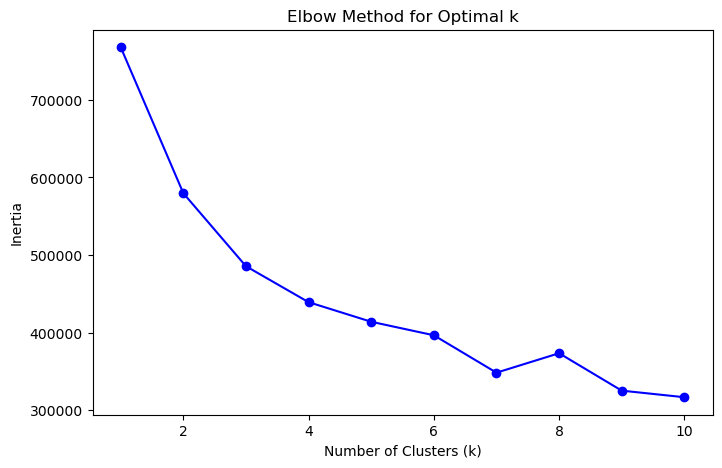

In [20]:
#to find k use elbow method
inertia=[]
k_values=list(range(1,11))
for k in k_values:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(x_scaled)
    inertia.append(model.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_scaled)

data_selected['Cluster'] = clusters

In [22]:
data_selected['Cluster'].value_counts()

Cluster
0    8713
2    7529
1    2036
Name: count, dtype: int64

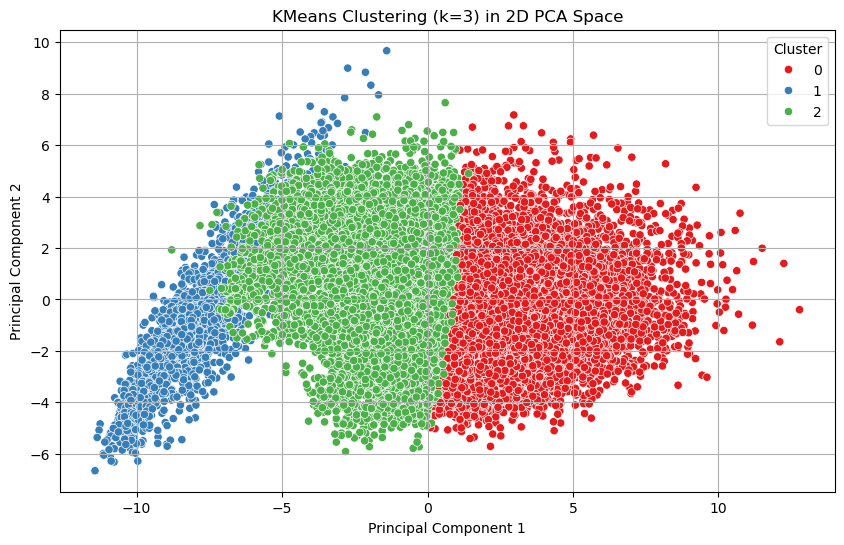

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce data to 2D for plotting
pca = PCA(n_components=2)
X_2d = pca.fit_transform(x_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=clusters, palette='Set1')
plt.title("KMeans Clustering (k=3) in 2D PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [24]:
cluster_profile = data_selected.groupby('Cluster').mean()
cluster_profile.T  # transpose for better view


Cluster,0,1,2
attacking_crossing,61.944795,14.120334,45.195776
attacking_finishing,59.771147,11.598723,38.371231
attacking_heading_accuracy,57.396304,14.138016,56.531412
attacking_short_passing,68.010674,26.993615,56.615752
attacking_volleys,55.800413,11.978880,36.112631
defending,49.940778,56.000000,53.419843
defending_marking,49.467233,14.694499,52.514012
dribbling,69.464134,64.000000,54.508833
gk_diving,65.000000,65.422397,65.000000
gk_handling,63.000000,63.146365,63.000000


In [25]:
#from the above data we were able to identify that cluster0 include attackers,cluster1 include gk,cluster2 include defenders and midfielders

In [26]:
top_countries=data['nationality'].value_counts().head(10)

In [54]:
top_countries

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

C:\Users\amalh\AppData\Local\Temp\ipykernel_16128\3405625970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis',legend=False)


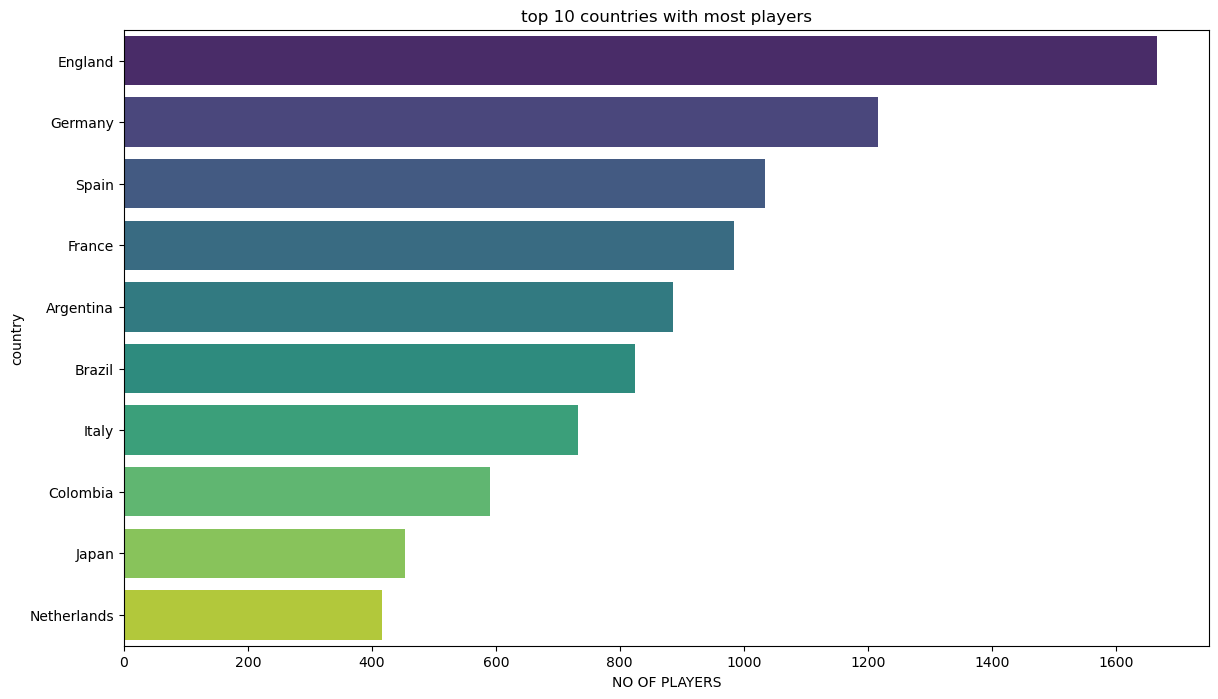

In [62]:
plt.figure(figsize=(14,8))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis',legend=False)
plt.title('top 10 countries with most players')
plt.xlabel('NO OF PLAYERS')
plt.ylabel('country')
plt.show()

In [64]:
#age vs overall rating

C:\Users\amalh\AppData\Local\Temp\ipykernel_16128\3851015784.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


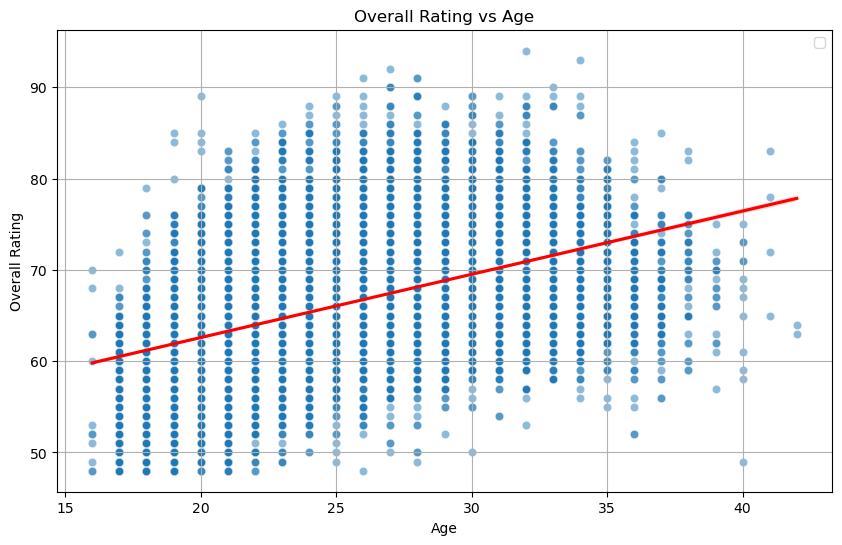

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['overall'], alpha=0.5)
sns.regplot(x=data['age'], y=data['overall'], scatter=False, color='red', line_kws={'label':"Trend"})
plt.title('Overall Rating vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#this shows that age alone does not describe how good a player is, it depends on other skills too

In [72]:
offensive_roles = ['ST', 'LW', 'RW']
data_offensive = data[data['player_positions'].str.contains('|'.join(offensive_roles), na=False)]
def parse_wage(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    return None

df_offensive['wage_eur'] = df_offensive['wage'].apply(parse_wage)

position_wages = {}
for role in offensive_roles:
    players_in_role = data_offensive[data_offensive['player_positions'].str.contains(role)]
    avg_wage = players_in_role['wage_eur'].mean()
    position_wages[role] = avg_wage


C:\Users\amalh\AppData\Local\Temp\ipykernel_16128\2532402406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(position_wages.keys()), y=list(position_wages.values()), palette='coolwarm')


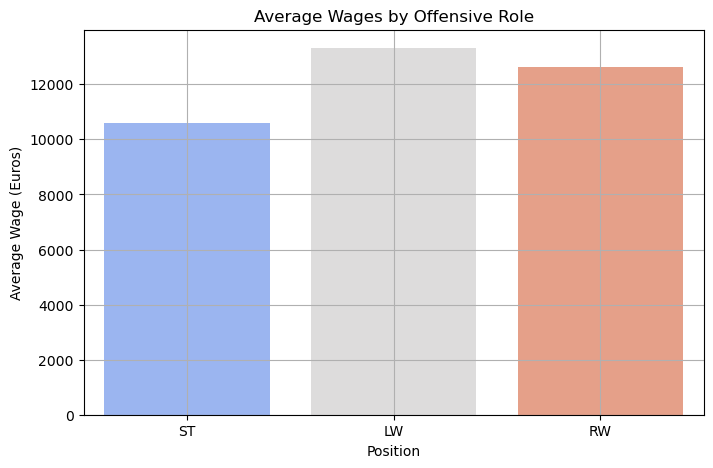

In [80]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(position_wages.keys()), y=list(position_wages.values()), palette='coolwarm')

plt.title('Average Wages by Offensive Role')
plt.xlabel('Position')
plt.ylabel('Average Wage (Euros)')
plt.grid(True)
plt.show()


In [82]:
#lw tends to have more salary

In [86]:
'''
project report

- This project aimed to explore and cluster FIFA 20 players based on skill attributes, and analyze various aspects like nationality, age trends, and position-based wages.
- We began by identifying skill-related features (values between 1–99), handled missing values using median imputation, and removed highly correlated features (correlation > 0.9).
- 42 final skill features were selected for clustering.
- Features were standardized before applying clustering using the KMeans algorithm.
- The optimal number of clusters (k=3) was identified using the Elbow method.
- Cluster labels were added to the dataset for further insights.

###  Task-based Analysis

#### 📍 Skill-Based Clustering
- KMeans successfully grouped players into 3 distinct clusters based on skill profiles.
- Each cluster represented different player types: offensive, balanced, or defensive.

####  Country Distribution
- Top 10 countries by player count included England, Germany, France, and Spain.
- Countries like Argentina and Brazil also contributed significantly to top football talent.

#### Overall Rating vs Age
from the graph it is evident that age alone does not describe how good a player is, it depends on other skills too

####  Offensive Role Wages
- Among ST, LW, and RW, **Left-Wingers (LW)** earned the highest average wage.
- Strikers (ST) had the lowest average wage in this comparison.

###  Challenges Faced
- Differentiating skill attributes from non-skill features in a dataset with 100+ columns.
- Handling players with multiple positions while grouping them accurately.
- Correlated skill features affected clustering quality, requiring careful selection.


'''



'\nproject report\n\n- This project aimed to explore and cluster FIFA 20 players based on skill attributes, and analyze various aspects like nationality, age trends, and position-based wages.\n- We began by identifying skill-related features (values between 1–99), handled missing values using median imputation, and removed highly correlated features (correlation > 0.9).\n- 42 final skill features were selected for clustering.\n- Features were standardized before applying clustering using the KMeans algorithm.\n- The optimal number of clusters (k=3) was identified using the Elbow method.\n- Cluster labels were added to the dataset for further insights.\n\n###  Task-based Analysis\n\n#### 📍 Skill-Based Clustering\n- KMeans successfully grouped players into 3 distinct clusters based on skill profiles.\n- Each cluster represented different player types: offensive, balanced, or defensive.\n\n####  Country Distribution\n- Top 10 countries by player count included England, Germany, France, an